In [1]:
import numpy as np
import h5py, glob, os
import nilearn 
from nilearn import image, plotting, masking
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (26, 20)


from nilearn.glm.first_level import FirstLevelModel
from nilearn.image import concat_imgs, mean_img
from nilearn.plotting import plot_stat_map, plot_anat, plot_img
import toolz


print('RUNNING')

%matplotlib auto
%matplotlib inline

RUNNING
Using matplotlib backend: MacOSX


In [3]:
subject = 790
session_n = 2

epi_fns = glob.glob('/Users/67981492/Desktop/BOLD_nii/sub-{}/ses-0{}/func/*space-T1w_desc-preproc_bold.nii.gz'.format(subject,session_n))

epi_fns.sort()

epi_imgs = []

for fn in epi_fns:
   print(fn)
   epi_img = nilearn.image.load_img(fn)
   epi_imgs.append(epi_img)

print(epi_imgs)

/Users/67981492/Desktop/BOLD_nii/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-01_space-T1w_desc-preproc_bold.nii.gz
/Users/67981492/Desktop/BOLD_nii/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-02_space-T1w_desc-preproc_bold.nii.gz
/Users/67981492/Desktop/BOLD_nii/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-03_space-T1w_desc-preproc_bold.nii.gz
/Users/67981492/Desktop/BOLD_nii/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-04_space-T1w_desc-preproc_bold.nii.gz
/Users/67981492/Desktop/BOLD_nii/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-05_space-T1w_desc-preproc_bold.nii.gz
[<nibabel.nifti1.Nifti1Image object at 0x7fbb3d23fe50>, <nibabel.nifti1.Nifti1Image object at 0x7fbb3686cc10>, <nibabel.nifti1.Nifti1Image object at 0x7fbb3686ca50>, <nibabel.nifti1.Nifti1Image object at 0x7fbb3686c850>, <nibabel.nifti1.Nifti1Image object at 0x7fbb3686cf50>]


In [4]:
 n_volumes = 738

for img in epi_imgs:
    print(img.shape)
    assert img.shape == epi_imgs[0].shape

(73, 92, 70, 738)
(73, 92, 70, 738)
(73, 92, 70, 738)
(73, 92, 70, 738)
(73, 92, 70, 738)


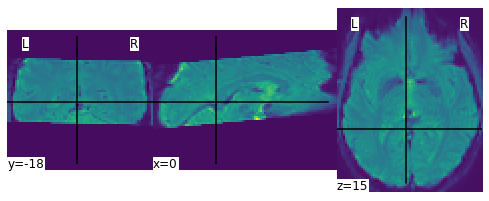

In [5]:
mean_img = mean_img(epi_imgs[0])

plot_img(mean_img)
plt.show()

In [6]:
events_fn = glob.glob('/Users/67981492/Desktop/loki_1/data/BOLD/sub-{}/fmriprep/sub-{}/ses-*{}/func/*{}*ses*{}*motor_events.tsv'.format(subject, subject, session_n, subject, session_n))

events_fn.sort()

n_trials_per_run = 60
stim_duration = 1.5

event_dfs = []

for event_fn in events_fn:

        print(event_fn)
        
        button_press_df = pd.DataFrame()
        
        all_events_df = pd.read_csv(event_fn)
        print('number of nonresponse trials :', n_trials_per_run - all_events_df.shape[0])
        run_n  = all_events_df.run_n.unique()[0]
        
        
        button_press_df['onset'] = all_events_df['button_press'].copy()
        button_press_df['trial_type'] = 'trial' # trial type will be iti v. response_time

        button_press_df['duration'] = stim_duration
        button_press_df['subject'] = subject
        button_press_df['session'] = session_n
        button_press_df['run_n'] = run_n

        event_dfs.append(button_press_df)
        
        fn = os.path.join(os.path.dirname(event_fn), 'sub-0{}_ses0{}_task-lokicat_run0{}_motor-ONLY_events.tsv').format(subject, session_n, run_n)


        button_press_df.to_csv(fn)
        
        print('file written as ', fn)

/Users/67981492/Desktop/loki_1/data/BOLD/sub-790/fmriprep/sub-790/ses-02/func/sub-0790_ses02_task-lokicat_run01_08132019_150642_motor_events.tsv
number of nonresponse trials : 21
file written as  /Users/67981492/Desktop/loki_1/data/BOLD/sub-790/fmriprep/sub-790/ses-02/func/sub-0790_ses02_task-lokicat_run01_motor-ONLY_events.tsv
/Users/67981492/Desktop/loki_1/data/BOLD/sub-790/fmriprep/sub-790/ses-02/func/sub-0790_ses02_task-lokicat_run02_08132019_152128_motor_events.tsv
number of nonresponse trials : 0
file written as  /Users/67981492/Desktop/loki_1/data/BOLD/sub-790/fmriprep/sub-790/ses-02/func/sub-0790_ses02_task-lokicat_run02_motor-ONLY_events.tsv
/Users/67981492/Desktop/loki_1/data/BOLD/sub-790/fmriprep/sub-790/ses-02/func/sub-0790_ses02_task-lokicat_run03_08132019_153231_motor_events.tsv
number of nonresponse trials : 1
file written as  /Users/67981492/Desktop/loki_1/data/BOLD/sub-790/fmriprep/sub-790/ses-02/func/sub-0790_ses02_task-lokicat_run03_motor-ONLY_events.tsv
/Users/67981

In [7]:
event_dfs[0].head()

,onset,trial_type,duration,subject,session,run_n
0,8.990787,trial,1.5,790,2,1
1,27.768674,trial,1.5,790,2,1
2,38.608361,trial,1.5,790,2,1
3,58.115948,trial,1.5,790,2,1
4,65.939554,trial,1.5,790,2,1


In [8]:
assert len(epi_imgs) == len(event_dfs), 'check run files'

In [9]:
print(len(event_dfs))
print([type(fn) for fn in event_dfs])
print([fn.shape for fn in event_dfs])

5
[<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>]
[(39, 6), (60, 6), (59, 6), (60, 6), (57, 6)]


In [10]:
epi_ordering = [print(img.get_filename()) for img in epi_imgs] # confirm ordering

/Users/67981492/Desktop/BOLD_nii/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-01_space-T1w_desc-preproc_bold.nii.gz
/Users/67981492/Desktop/BOLD_nii/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-02_space-T1w_desc-preproc_bold.nii.gz
/Users/67981492/Desktop/BOLD_nii/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-03_space-T1w_desc-preproc_bold.nii.gz
/Users/67981492/Desktop/BOLD_nii/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-04_space-T1w_desc-preproc_bold.nii.gz
/Users/67981492/Desktop/BOLD_nii/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-05_space-T1w_desc-preproc_bold.nii.gz


In [11]:
event_ordering = [print(event.subject.unique(), event.session.unique(), event.run_n.unique()) for event in event_dfs] # confirm ordering

[790] [2] [1]
[790] [2] [2]
[790] [2] [3]
[790] [2] [4]
[790] [2] [5]


In [12]:
img_nan_check = [print('all values in epi finite? ', np.isfinite(img.get_fdata()).sum()  == (img.shape[0] * img.shape[1] * img.shape[2] * img.shape[3])) for img in epi_imgs]

all values in epi finite?  True
all values in epi finite?  True
all values in epi finite?  True
all values in epi finite?  True
all values in epi finite?  True


In [13]:
event_nan_check = [print('all values in events finite? ', event.sum().notnull().all()) for event in event_dfs]

all values in events finite?  True
all values in events finite?  True
all values in events finite?  True
all values in events finite?  True
all values in events finite?  True


# Estimating the GLM. I made the default parameters explicit in case of later debugging.

In [14]:
TR = 0.75

fmri_glm = FirstLevelModel(t_r=TR,
                           hrf_model='glover',
                           drift_model='cosine',
                           high_pass=0.01,
                           drift_order=1,
                           noise_model='ar1',
                           slice_time_ref=0.0,
                           standardize=False, 
                           signal_scaling=False,
                           n_jobs=-1,
                           smoothing_fwhm=None,
                           subject_label=subject,
                           minimize_memory=False) # don't minimize memory so we can get all the parameters of the model 

In [15]:
fmri_glm = fmri_glm.fit(run_imgs=epi_imgs, events=event_dfs)

/Users/67981492/opt/anaconda3/lib/python3.7/site-packages/nilearn/glm/first_level/first_level.py:130: RuntimeWarning: invalid value encountered in true_divide
  / (ols_result.residuals ** 2).sum(axis=0)


In [16]:
fmri_glm.get_params

<bound method BaseEstimator.get_params of FirstLevelModel(minimize_memory=False, n_jobs=-1, signal_scaling=False,
                t_r=0.75)>

In [17]:
np.unique(fmri_glm.r_square[0].get_fdata())

array([0.        , 0.00206317, 0.00222056, ..., 0.92864852, 0.93294151,
       0.93863476])

In [18]:
type(fmri_glm.results_[0][0])

nilearn.glm.regression.RegressionResults

## Confirm that masking strategy used internally by the first level GLM is appropriate

masking strategy used by glm:  NiftiMasker(mask_strategy='epi', t_r=0.75)


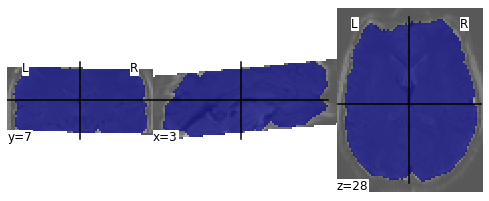

In [20]:
print('masking strategy used by glm: ', fmri_glm.masker_)
mask_img = fmri_glm.masker_.mask_img_
plotting.plot_roi(mask_img, bg_img=mean_img, black_bg=False)

# Note that the first design matrix looks sparse because there were many nonresponses in run 1 of session 2 for subject 790.

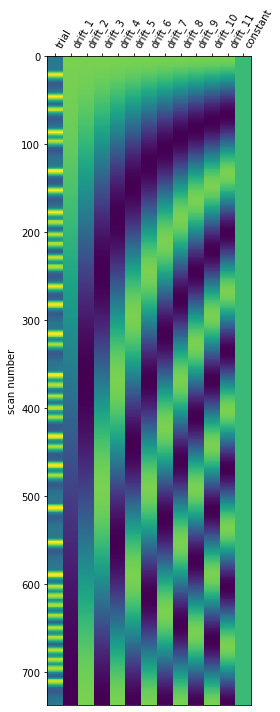

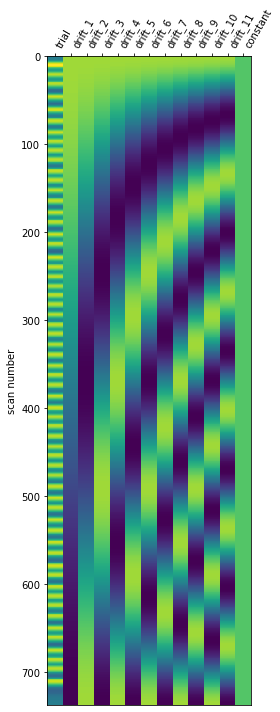

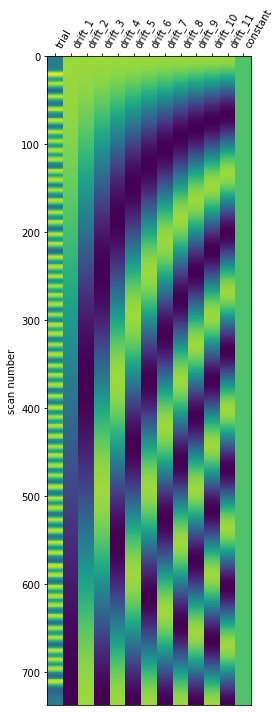

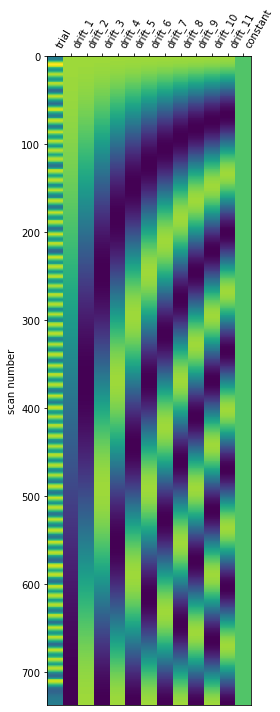

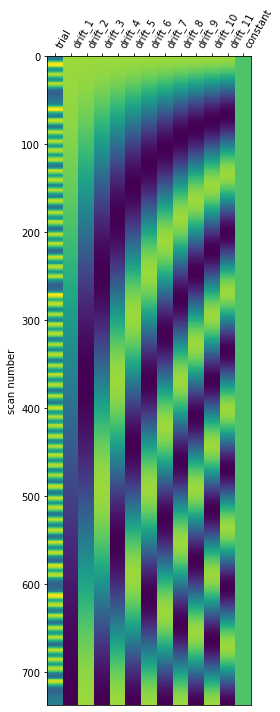

In [21]:
from nilearn.plotting import plot_design_matrix

for design_matrix in fmri_glm.design_matrices_:

    plot_design_matrix(design_matrix)
    plt.show()

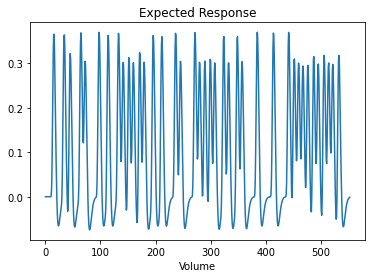

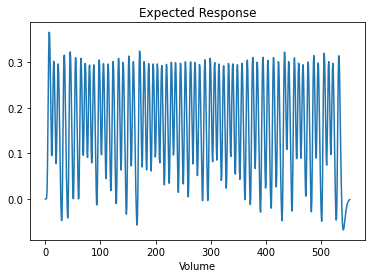

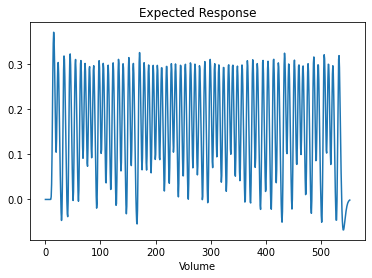

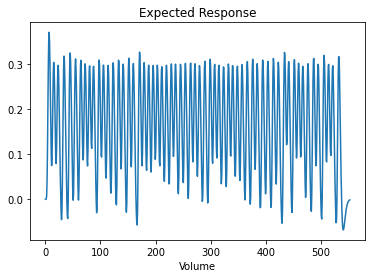

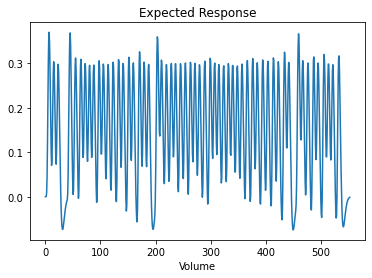

In [22]:
for design_matrix in fmri_glm.design_matrices_:
    
    plt.figure()
    plt.plot(design_matrix['trial'])
    plt.xlabel('Volume')
    plt.title('Expected Response')

# Plotting the $R^2$ values for each voxel. 

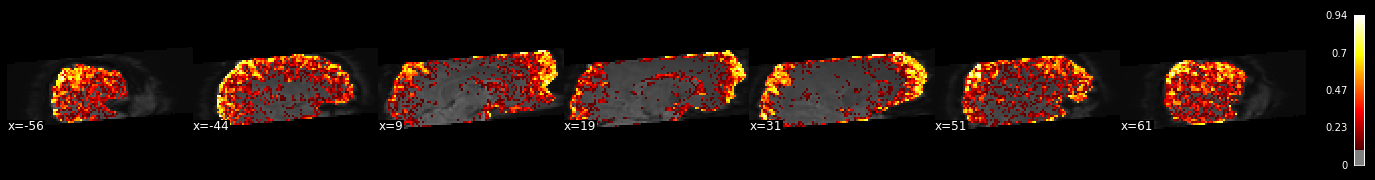

In [23]:
plotting.plot_stat_map(fmri_glm.r_square[0], bg_img=mean_img, threshold=.1,
                       display_mode='x', cut_coords=7)

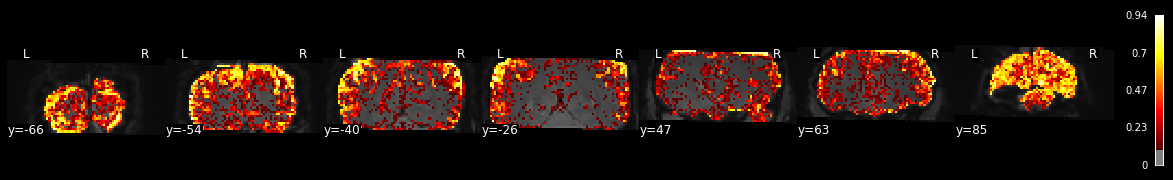

In [24]:
plotting.plot_stat_map(fmri_glm.r_square[0], bg_img=mean_img, threshold=.1,
                       display_mode='y', cut_coords=7)

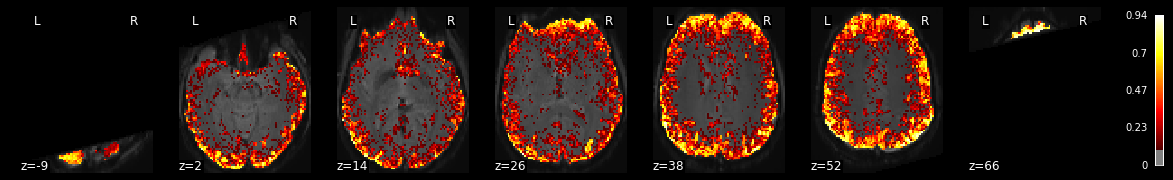

In [25]:
plotting.plot_stat_map(fmri_glm.r_square[0], bg_img=mean_img, threshold=.1,
                       display_mode='z', cut_coords=7)

# "Contrast" definition. (estimate - 0) hack to just get the beta estimates.

In [27]:
trial_condition_array = np.zeros(design_matrix.shape[1])
trial_condition_array_dummy = np.zeros(design_matrix.shape[1])

trial_condition_array[0] = 1.

print(trial_condition_array, trial_condition_array_dummy)

conditions = {
    'trial': trial_condition_array,
    'trial_dummy': trial_condition_array_dummy,
}

trial_response = conditions['trial'] - conditions['trial_dummy']


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

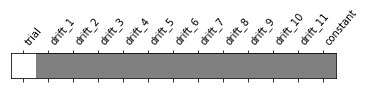

<Figure size 432x288 with 0 Axes>

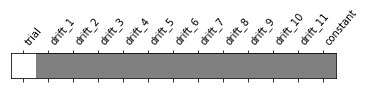

<Figure size 432x288 with 0 Axes>

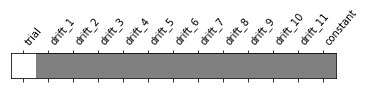

<Figure size 432x288 with 0 Axes>

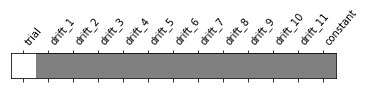

<Figure size 432x288 with 0 Axes>

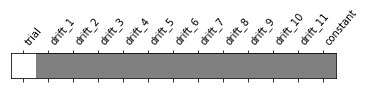

In [28]:
from nilearn.plotting import plot_contrast_matrix
for design_matrix in fmri_glm.design_matrices_:
    plt.figure()
    plot_contrast_matrix(trial_response, design_matrix=design_matrix)

In [32]:
trial_response_estimate = [trial_response]*run_n # one for each run (all identica)

In [33]:
print(trial_response_estimate)

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]


In [34]:
eff_map = fmri_glm.compute_contrast(trial_response_estimate,
                                    output_type='effect_size')

z_map = fmri_glm.compute_contrast(trial_response_estimate,
                                  output_type='z_score')

/Users/67981492/opt/anaconda3/lib/python3.7/site-packages/nilearn/_utils/glm.py:300: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(X <= 0, 0, 1. / X)


In [35]:
print('nans in effect map? ', np.isnan(np.unique(eff_map.get_data())).sum()) # check stat. maps for nans. 
print('nans in z map? ', np.isnan(np.unique(z_map.get_data())).sum()) # check stat. maps for nans.

nans in effect map?  0
nans in z map?  0


/Users/67981492/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.
/Users/67981492/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


# Uncorrected maps of effect size & z-scores

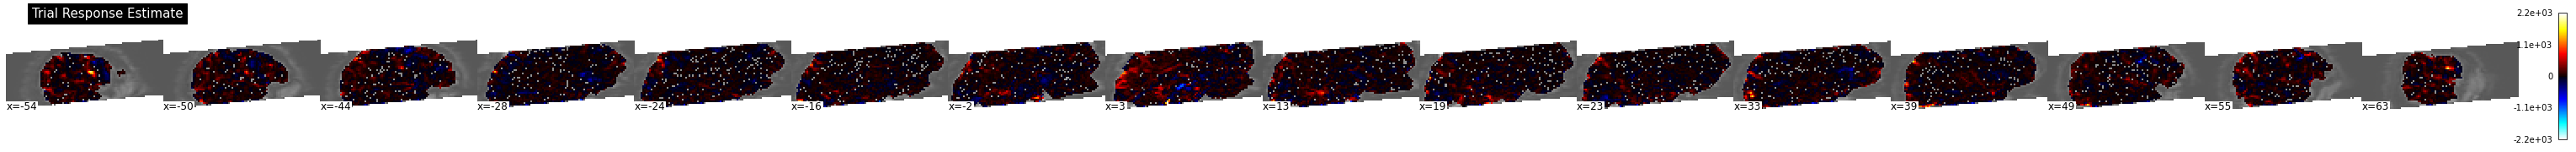

In [81]:
# just the uncorrected effect estimates using default threshold
plot_stat_map(eff_map, bg_img=mean_img, threshold=3,
              display_mode='x', cut_coords=16, black_bg=False,
              title='Trial Response Estimate')

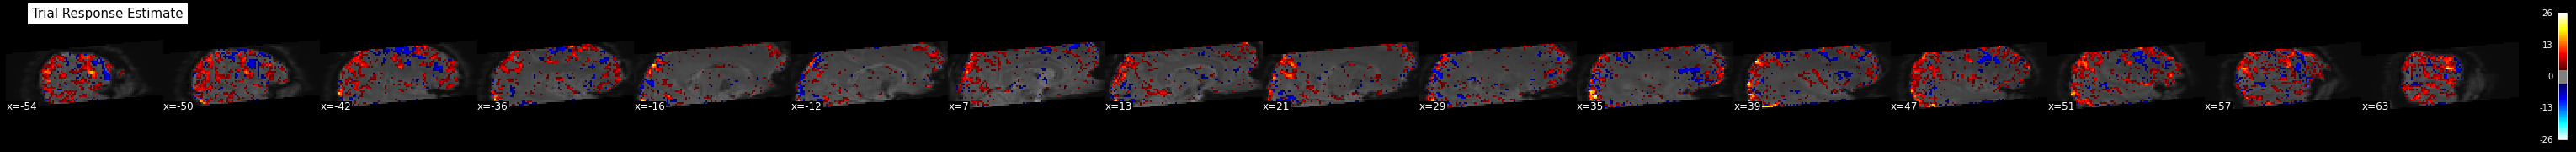

In [38]:
# the uncorrected z-scored estimates using default threshold
plot_stat_map(z_map, bg_img=mean_img, threshold=3,
              display_mode='x', cut_coords=16, black_bg=True,
              title='Trial Response Estimate')

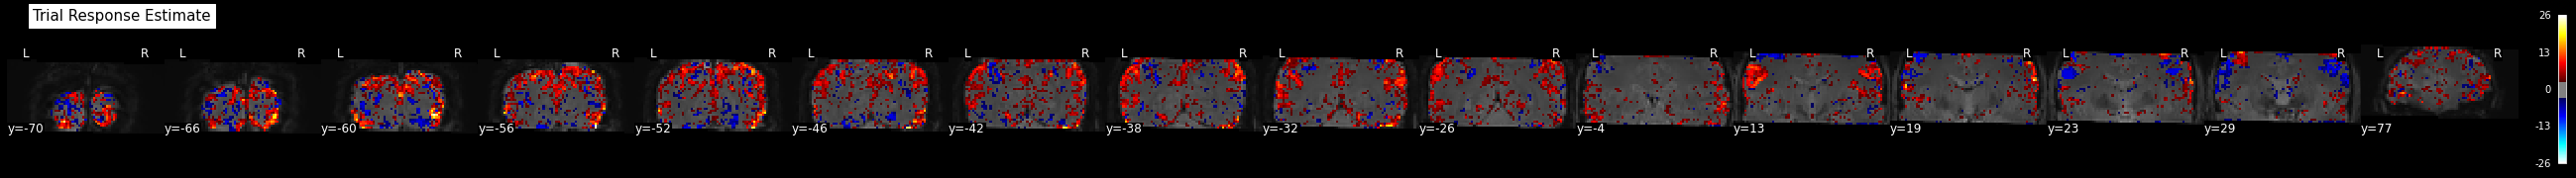

In [39]:
plot_stat_map(z_map, bg_img=mean_img, threshold=3,
              display_mode='y', cut_coords=16, black_bg=True,
              title='Trial Response Estimate')

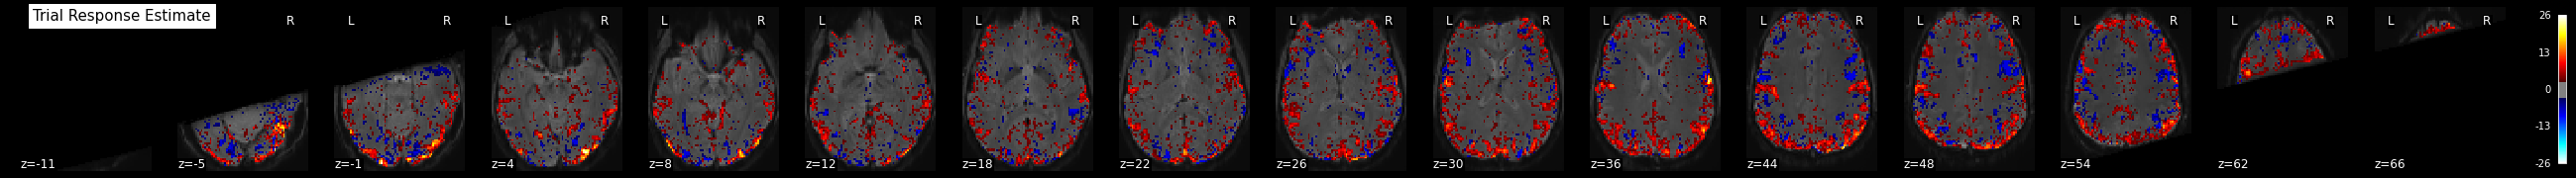

In [41]:
plot_stat_map(z_map, bg_img=mean_img, threshold=3,
              display_mode='z', cut_coords=16, black_bg=True,
              title='Trial Response Estimate')

# FDR-corrected views of z-scored maps with p < .001 & a minimum cluster size of 30 voxels (30 slices)

In [75]:
from nilearn.glm import threshold_stats_img

clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fdr', cluster_threshold=30)

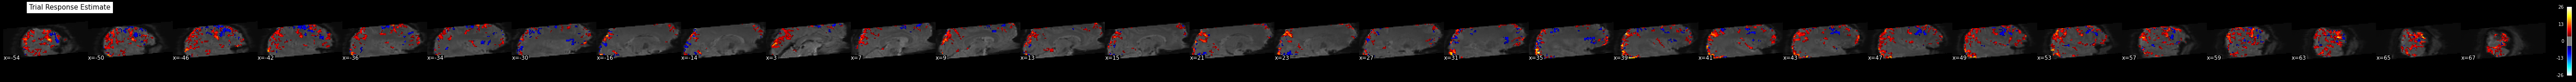

In [69]:
plot_stat_map(clean_map, bg_img=mean_img, threshold=threshold,
              display_mode='x', cut_coords=30, black_bg=True,
              title='Trial Response Estimate')
plt.savefig('/Users/67981492/Desktop/motor-ONLY-non_z_map_FDR001_sess{}_{}_xview.pdf'.format(session_n, subject))

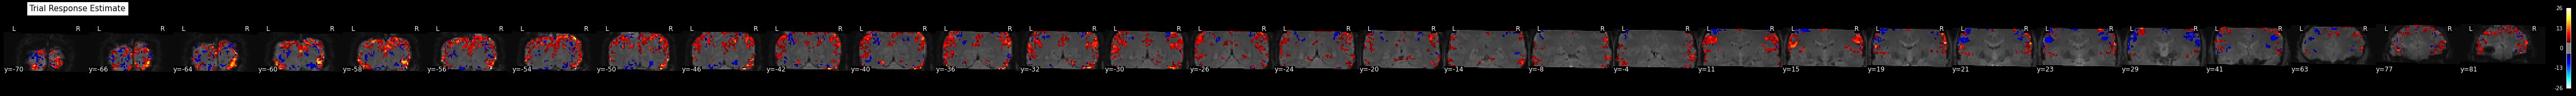

In [68]:
plot_stat_map(clean_map, bg_img=mean_img, threshold=threshold,
              display_mode='y', cut_coords=30, black_bg=True,
              title='Trial Response Estimate')

plt.savefig('/Users/67981492/Desktop/motor-ONLY_z_map_FDR001_sess{}_{}_yview.pdf'.format(session_n, subject))

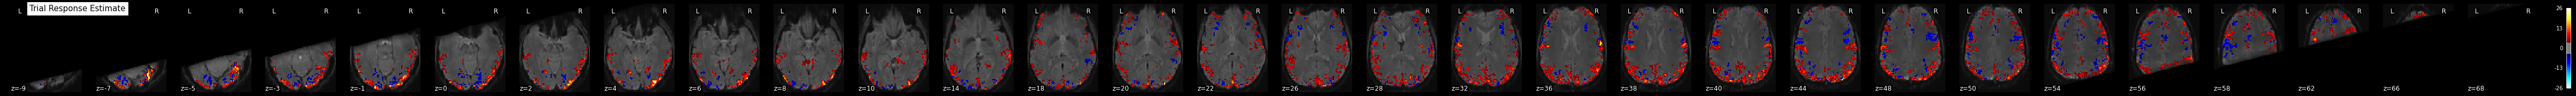

In [74]:
plot_stat_map(clean_map, bg_img=mean_img, threshold=threshold,
              display_mode='z', cut_coords=30, black_bg=True,
              title='Trial Response Estimate')

plt.savefig('/Users/67981492/Desktop/motor-ONLY_z_map_FDR001_sess{}_{}_zview.pdf'.format(session_n, subject))

# For interactive viewing


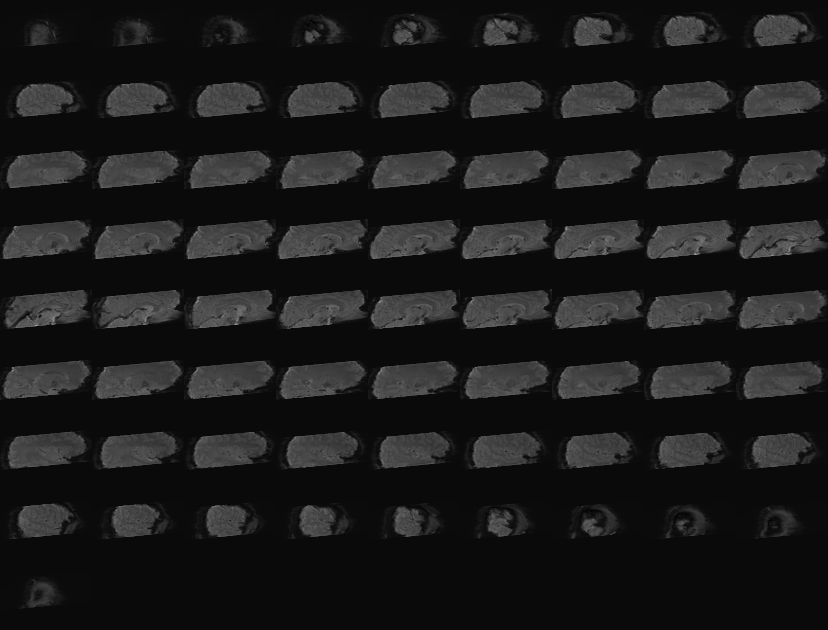
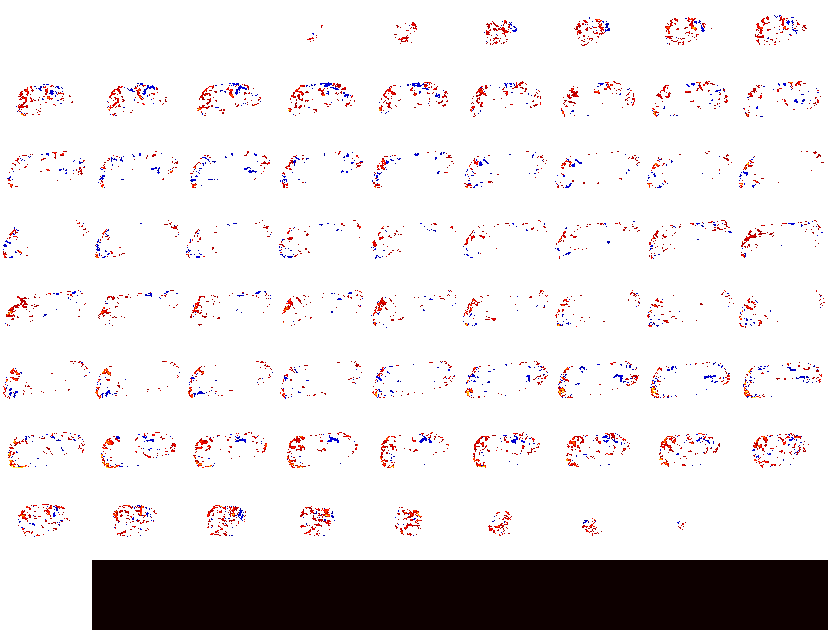

In [53]:
 nilearn.plotting.view_img(clean_map, bg_img=mean_img, display_mode='x', black_bg=True,
                         threshold=5)

In [82]:
z_map.to_filename('/Users/67981492/Desktop/motor-ONLY_z_map_sess{}_{}.nii.gz'.format(session_n, subject))

In [83]:
clean_map.to_filename('/Users/67981492/Desktop/motor-ONLY_z_map_FDR_sess{}_{}.nii.gz'.format(session_n, subject))